In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('Large_Random_Forest_Training_Data__Health_Data__-_4000_rows.csv')

In [3]:
data.head()

,Heart_Rate,Blood_Pressure,Cholesterol,BMI,Glucose_Level,Target
0,0.268142,2.154760,2.036920,0.557769,-0.141854,0
1,-0.314863,1.379375,-2.779966,4.265799,-1.659737,1
2,-0.029815,0.388929,-0.300872,0.793487,-0.374738,1
3,0.086969,1.426796,0.531902,1.400712,-0.842731,0
4,-0.059243,-4.228304,-0.104732,-4.699692,1.564162,1


In [4]:
print(data.isnull().sum())


Heart_Rate        0
Blood_Pressure    0
Cholesterol       0
BMI               0
Glucose_Level     0
Target            0
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1] 

In [7]:
X = pd.get_dummies(X, drop_first=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = rf_classifier.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.98125
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       406
           1       0.98      0.98      0.98       394

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np


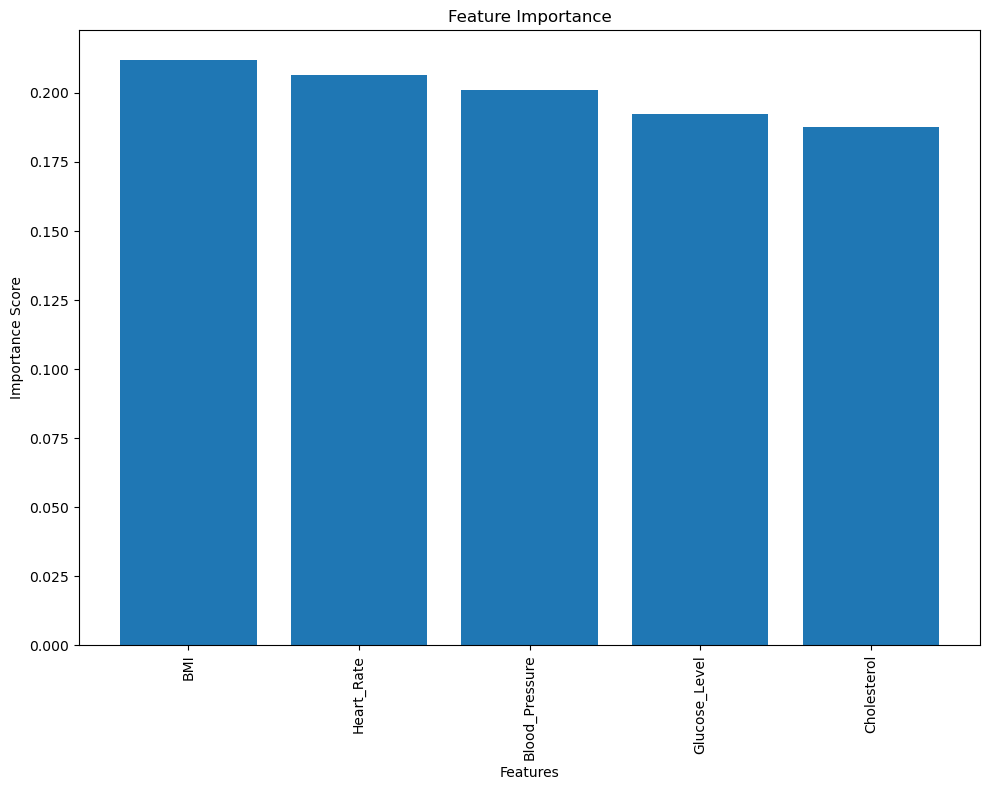

In [13]:
# Plot feature importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


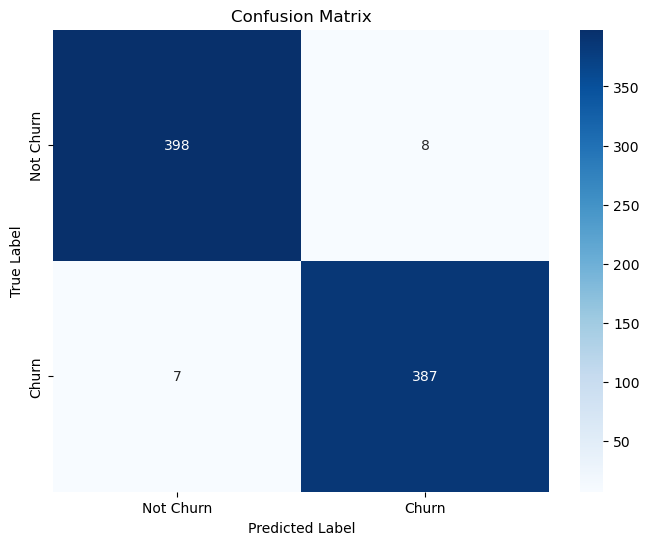

In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
